# Dissertation Code

In [126]:
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from math import ceil
from scipy import stats
import scipy.stats as norm
from sklearn import metrics
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from binarize_amenities import create_binarized_df
from sklearn.model_selection import train_test_split
from statsmodels.stats.weightstats import ztest as ztest

## Read Data

In [127]:
listings_raw =  pd.read_csv('Listings.csv', encoding = 'latin1')
#reviews_raw =  pd.read_csv('Reviews.csv', encoding = 'latin1')

C:\Users\Spand\AppData\Local\Temp\ipykernel_25760\299332461.py:1: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_raw =  pd.read_csv('Listings.csv', encoding = 'latin1')


## Reviews

In [128]:
#Reviews
#list(reviews_raw.columns)

#reviews_raw.dtypes

#reviews_raw.isnull().sum().sum()
#0
#reviews_raw["date"] = pd.to_datetime(reviews_raw["date"])
#reviews_raw.dtypes

#reviews_raw.shape
#(5373143, 4)
#reviews_raw['listing_id'].nunique()
#193556

#Grouping to get reviews for each listing
#reviews = reviews_raw.groupby(['listing_id']).size()

#reviews.shape
#193556

## Listings

In [129]:
listings_raw.shape

(279712, 33)

In [130]:
listings_raw.dtypes

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

In [131]:
listings_raw.shape

(279712, 33)

In [132]:
listings_raw.groupby(['city']).size()

city
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Istanbul          24519
Mexico City       20065
New York          37012
Paris             64690
Rio de Janeiro    26615
Rome              27647
Sydney            33630
dtype: int64

In [133]:
cities_selected = ['Paris', 'Sydney', 'New York', 'Bangkok']
listings_cities = listings_raw.loc[listings_raw['city'].isin(cities_selected)]

In [134]:
listings_cities.shape

(154693, 33)

In [135]:
listings_cities.groupby(['city']).size()

city
Bangkok     19361
New York    37012
Paris       64690
Sydney      33630
dtype: int64

In [136]:
listings_cities = listings_cities.drop(columns = ['name', 'host_has_profile_pic', 'host_identity_verified', 'host_total_listings_count', 'district', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'minimum_nights', 'maximum_nights', 'latitude', 'longitude'])
listings_cities.head()

,listing_id,host_id,host_since,host_is_superhost,neighbourhood,city,property_type,room_type,accommodates,bedrooms,amenities,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,1466919,2011-12-03,f,Buttes-Montmartre,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,10328771,2013-11-29,f,Buttes-Montmartre,Paris,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,19252768,2014-07-31,f,Elysee,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,10668311,2013-12-17,f,Vaugirard,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,24837558,2014-12-14,f,Passy,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [137]:
listings_cities.shape

(154693, 20)

In [138]:
listings_cities.isnull().sum().sum()
#Drop all nulls
#20264

listings_cities = listings_cities.dropna()

## Reveiw Scores

In [139]:
review_scores = listings_cities[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

listings_cities = listings_cities.drop(columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'])

#listings_cities['amenities'] = listings_cities['amenities'].str[:-1] 
#listings_cities['amenities'] = listings_cities['amenities'].str[1:] 
#listings_cities.shape
listings_cities.head()

,listing_id,host_id,host_since,host_is_superhost,neighbourhood,city,property_type,room_type,accommodates,bedrooms,amenities,price,instant_bookable
0,281420,1466919,2011-12-03,f,Buttes-Montmartre,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,f
1,3705183,10328771,2013-11-29,f,Buttes-Montmartre,Paris,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,f
2,4082273,19252768,2014-07-31,f,Elysee,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,f
3,4797344,10668311,2013-12-17,f,Vaugirard,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,f
4,4823489,24837558,2014-12-14,f,Passy,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,f


## Amenities

In [140]:
amen_list = []

for i in listings_cities.amenities:
    b = i.replace('"','')
    a = b.split(',')
    for j in a:
        amen_list.append(j)
        
Counter(amen_list).most_common(20)
# Wifi, Heating, Kitchen, TV, Hair Dryer, Dedicated Workplace
#Make Long Term stays allowed a seperate column

[(' Wifi', 85676),
 (' Essentials', 81082),
 (' Kitchen', 75057),
 (' Long term stays allowed', 73442),
 (' Hangers', 72352),
 (' Hair dryer', 65421),
 (' Heating', 65420),
 (' Smoke alarm', 65227),
 (' TV', 63356),
 (' Hot water', 61044),
 (' Iron', 60908),
 (' Dedicated workspace', 58941),
 (' Shampoo', 56990),
 (' Washer', 55732),
 (' Dishes and silverware', 48907),
 (' Cooking basics', 41842),
 (' Dryer', 38546),
 (' Refrigerator', 37845),
 (' Microwave', 37663),
 (' Stove', 36794)]

In [141]:
amenities_names = ['Wifi', "Heating", "Kitchen", "TV", "Dedicated workspace"]

def create_binarized_df(base_df, amenities_names):
    amen_list = []
    binarized_list = []
    new_amen_list = []

    for i in base_df.amenities:
        b = i.replace('"','')
        a = b.split(',')
        per_unit_list = []
        for j in a:
            # print(j.split('[')[-1].split(']')[-1])
            # break
            per_unit_list.append(j.split('[')[-1].split(']')[-1])
        amen_list.append(per_unit_list)
    
    for i in amen_list:
        mid_list = []
        for j in i:
            j = j.lstrip()
            mid_list.append(j)
        new_amen_list.append(mid_list)
    
    for item in new_amen_list:
        mask_list = [0]*len(amenities_names)
        for i in range(0,len(amenities_names)):
            if amenities_names[i] in item:
                mask_list[i] = 1
        binarized_list.append(mask_list)
    # print(item)
    
    amenities_df = pd.DataFrame(binarized_list, columns=amenities_names)

    base_df_sans_amenities = base_df.drop(columns='amenities')
    concat_df = pd.concat([base_df_sans_amenities, amenities_df], axis = 1)
    
    return concat_df
    
listings_cities = create_binarized_df(listings_cities, amenities_names)

In [142]:
#Converting binazrized columns to boolean
listings_cities['Wifi'] = listings_cities['Wifi'].astype('bool')
listings_cities['Heating'] = listings_cities['Heating'].astype('bool')
listings_cities['Kitchen'] = listings_cities['Kitchen'].astype('bool')
listings_cities['TV'] = listings_cities['TV'].astype('bool')
listings_cities['Dedicated workspace'] = listings_cities['Dedicated workspace'].astype('bool')

#Replace values in superhost and 
listings_cities = listings_cities.replace({'host_is_superhost': {'t': True, 'f': False}})
listings_cities = listings_cities.replace({'instant_bookable': {'t': True, 'f': False}})

In [143]:
listings_cities.head()
#listings_cities.groupby(['Wifi']).size()

,listing_id,host_id,host_since,host_is_superhost,neighbourhood,city,property_type,room_type,accommodates,bedrooms,price,instant_bookable,Wifi,Heating,Kitchen,TV,Dedicated workspace
0,281420.0,1466919.0,2011-12-03,False,Buttes-Montmartre,Paris,Entire apartment,Entire place,2.0,1.0,53.0,False,True,True,True,False,False
1,3705183.0,10328771.0,2013-11-29,False,Buttes-Montmartre,Paris,Entire apartment,Entire place,2.0,1.0,120.0,False,True,True,True,False,False
2,4082273.0,19252768.0,2014-07-31,False,Elysee,Paris,Entire apartment,Entire place,2.0,1.0,89.0,False,True,True,True,True,False
3,4797344.0,10668311.0,2013-12-17,False,Vaugirard,Paris,Entire apartment,Entire place,2.0,1.0,58.0,False,True,True,True,True,False
4,4823489.0,24837558.0,2014-12-14,False,Passy,Paris,Entire apartment,Entire place,2.0,1.0,60.0,False,True,True,True,True,False


## Currency Conversion

In [144]:
# 1 EUR = 1.1 USD
# 1 AUS = 0.66 USD
# 1 HKD = 0.13 USD

def convert_to_usd(row):
    city = row['city']
    price = row['price']
    if city == 'Paris':
        exchange_rate = 1.1
    elif city == 'Sydney':
        exchange_rate = 0.66
    elif city == 'Bangkok':
        exchange_rate = 0.13
    else:
        exchange_rate = 1
    return price * exchange_rate

listings_cities['Price_USD'] = listings_cities.apply(convert_to_usd, axis = 1)
listings_cities['USD_pp'] = listings_cities['Price_USD']/listings_cities['accommodates']
listings_dupe = listings_cities

### Host Duration 

In [145]:
#end = date.today()

end = datetime(2023, 9, 1)
#print(end)

listings_cities['host_since'] = pd.to_datetime(listings_cities['host_since'], format='%Y/%m/%d')

listings_cities['Host Months'] = (pd.to_datetime(end) - pd.to_datetime(listings_cities.host_since)).dt.days

#listings_cities.dtypes
listings_cities['Host Months'] = listings_cities['Host Months'].astype(float)
listings_cities['Host Months'] = listings_cities['Host Months']/30
listings_cities['Host Months'] = np.ceil(listings_cities['Host Months'])

listings_cities['Host Months'].fillna(0, inplace = True)

listings_cities.head()

,listing_id,host_id,host_since,host_is_superhost,neighbourhood,city,property_type,room_type,accommodates,bedrooms,price,instant_bookable,Wifi,Heating,Kitchen,TV,Dedicated workspace,Price_USD,USD_pp,Host Months
0,281420.0,1466919.0,2011-12-03,False,Buttes-Montmartre,Paris,Entire apartment,Entire place,2.0,1.0,53.0,False,True,True,True,False,False,58.3,29.15,143.0
1,3705183.0,10328771.0,2013-11-29,False,Buttes-Montmartre,Paris,Entire apartment,Entire place,2.0,1.0,120.0,False,True,True,True,False,False,132.0,66.00,119.0
2,4082273.0,19252768.0,2014-07-31,False,Elysee,Paris,Entire apartment,Entire place,2.0,1.0,89.0,False,True,True,True,True,False,97.9,48.95,111.0
3,4797344.0,10668311.0,2013-12-17,False,Vaugirard,Paris,Entire apartment,Entire place,2.0,1.0,58.0,False,True,True,True,True,False,63.8,31.90,119.0
4,4823489.0,24837558.0,2014-12-14,False,Passy,Paris,Entire apartment,Entire place,2.0,1.0,60.0,False,True,True,True,True,False,66.0,33.00,107.0


### Room Type Mapping

In [146]:
room_type_mapping = {'Shared room': 0, 'Private room': 1, 'Entire place': 2, 'Hotel room': 3}
listings_cities['room_type_code'] = listings_cities['room_type'].map(room_type_mapping)

## Outlier Detection

In [147]:
#Remove the 0s

#listings_cities[listings_cities.accommodates == 0].shape[0]
#68
#listings_cities[listings_cities.Price_USD == 0].shape[0]
#23

listings_cities = listings_cities[listings_cities['accommodates'] != 0]
listings_cities = listings_cities[listings_cities['Price_USD'] != 0]

#fig = plt.figure(figsize =(10, 7))
#plt.boxplot(listings_cities['accommodates'])
#plt.show()

listings_cities.shape

(153242, 21)

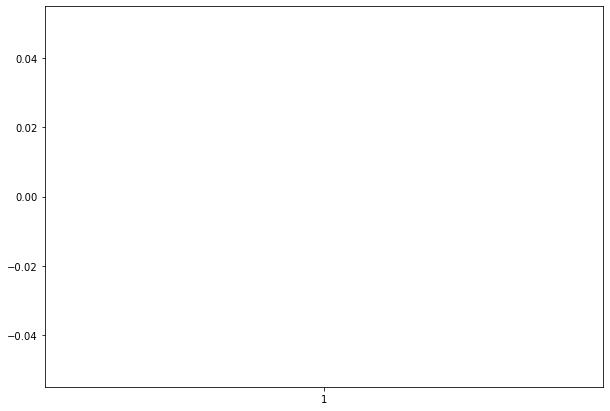

In [148]:
#listings_cities =  listings_dupe

fig = plt.figure(figsize =(10, 7))
plt.boxplot(listings_cities['USD_pp'])
plt.show()

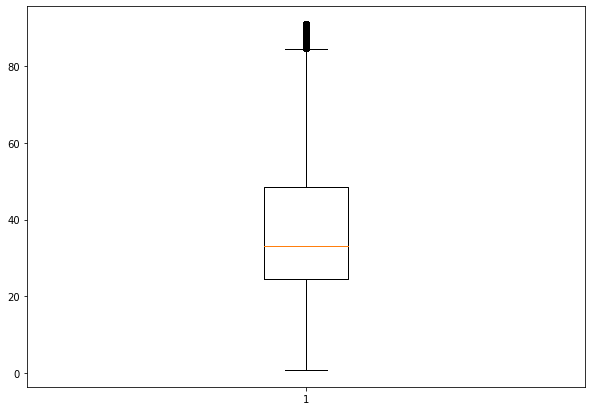

In [149]:
#Remove the higher outliers
Q1 = listings_cities['USD_pp'].quantile(0.25)
Q3 = listings_cities['USD_pp'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper

listings_cities = listings_cities[listings_cities['USD_pp'] < upper]

fig = plt.figure(figsize =(10, 7))
plt.boxplot(listings_cities['USD_pp'])
plt.show()

In [150]:
listings_cities.shape

(87523, 21)

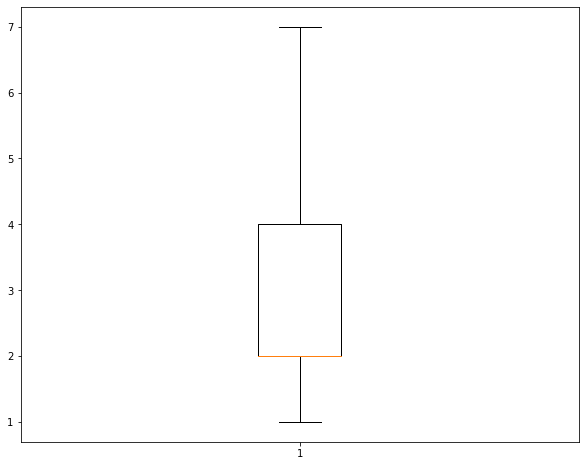

In [151]:
listings_cities = listings_cities[listings_cities['accommodates'] < 8]

fig = plt.figure(figsize =(10, 8))
plt.boxplot(listings_cities['accommodates'])
plt.show()

In [152]:
listings_cities.shape

(84261, 21)

In [153]:
#listings_c = listings_cities[listings_cities['Price_USD']]

#fig = plt.figure(figsize =(10, 7))
#plt.boxplot(listings_cities['USD_pp'])
#plt.show()

#listings_cities['USD_pp'].plot(kind='kde')
min(listings_cities['USD_pp'])

1.2100000000000002

## Charts 

C:\Users\Spand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Listings')

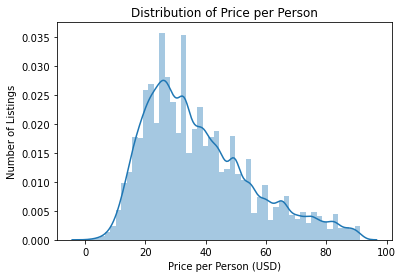

In [154]:
sns.distplot(listings_cities['USD_pp'])
plt.title('Distribution of Price per Person')
plt.xlabel('Price per Person (USD)')
plt.ylabel('Number of Listings')

In [155]:
df1 = pd.DataFrame(listings_cities.describe())
df1

,listing_id,host_id,accommodates,bedrooms,price,Price_USD,USD_pp,Host Months,room_type_code
count,8.426100e+04,8.426100e+04,84261.000000,84261.000000,84261.000000,84261.000000,84261.000000,84261.000000,84261.000000
mean,2.303495e+07,8.560985e+07,2.995799,1.319282,198.950143,107.593328,37.613136,96.627764,1.693500
std,1.352455e+07,9.780567e+07,1.427896,0.652310,335.983448,70.870110,17.708301,28.612933,0.519045
min,2.577000e+03,2.571000e+03,1.000000,1.000000,8.000000,7.260000,1.210000,32.000000,0.000000
25%,1.150163e+07,1.194586e+07,2.000000,1.000000,65.000000,60.500000,24.500000,76.000000,1.000000
50%,2.250434e+07,4.003715e+07,2.000000,1.000000,98.000000,89.100000,33.000000,99.000000,2.000000
75%,3.496263e+07,1.346240e+08,4.000000,2.000000,160.000000,132.000000,48.400000,117.000000,2.000000
max,4.807656e+07,3.868271e+08,7.000000,46.000000,4796.000000,627.000000,91.190000,183.000000,3.000000


C:\Users\Spand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No. of Listings')

<Figure size 720x360 with 0 Axes>

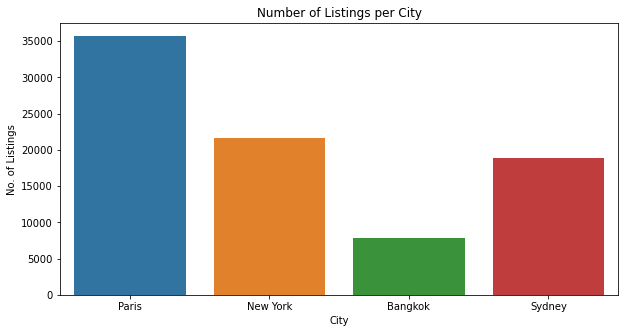

In [156]:
#mytable = pd.DataFrame(listings_cities.groupby(['host_id'])['listing_id'].count())
#df2 = pd.DataFrame(mytable['listing_id'].value_counts()).reset_index().rename(columns = {'index':'count'})
#df2
#df2.to_csv("num_list.csv", index = False)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.figure(figsize = (10, 5))

sns.countplot(listings_cities['city'])
plt.title('Number of Listings per City')
plt.xlabel('City')
plt.ylabel('No. of Listings')

Text(0.5, 1.0, 'Listings per City')

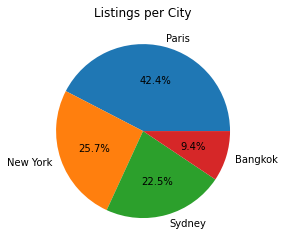

In [157]:
#cities_count = listings_cities.groupby(['city']).size()
#cities_count

#fig, ax = plt.subplots()
#ax.pie(listings_cities.city, labels = city, autopct = '%1.1f%%')

plt.pie(listings_cities['city'].value_counts().values, 
        labels = listings_cities['city'].value_counts().index, 
        autopct = '%1.1f%%')

plt.title('Listings per City')
#plt.legend()

C:\Users\Spand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No. of Listings')

<Figure size 720x360 with 0 Axes>

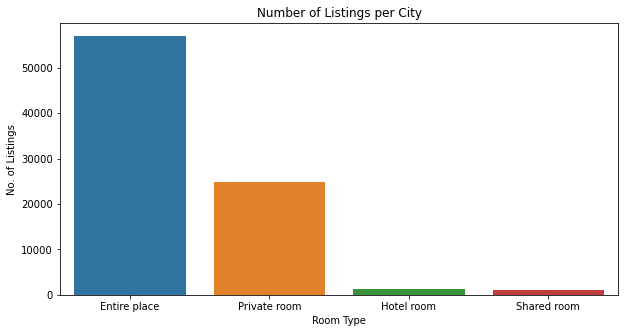

In [158]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.figure(figsize = (10, 5))

sns.countplot(listings_cities['room_type'])
plt.title('Number of Listings per City')
plt.xlabel('Room Type')
plt.ylabel('No. of Listings')

Text(0.5, 1.0, 'Listings by Room Type')

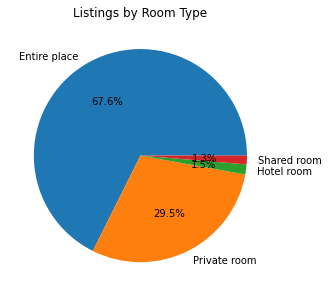

In [159]:
plt.pie(listings_cities['room_type'].value_counts().values, 
        labels = listings_cities['room_type'].value_counts().index, 
        autopct = '%1.1f%%')
#fix_labels(autopct, sepfactor=3)
plt.tight_layout()
plt.title('Listings by Room Type')

Text(0.5, 1.0, 'Listings with Heating')

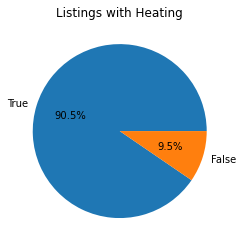

In [160]:
plt.pie(listings_cities['Heating'].value_counts().values, 
        labels = listings_cities['Heating'].value_counts().index, 
        autopct = '%1.1f%%')

plt.title('Listings with Heating')

Text(0.5, 1.0, 'Listings with Kitchen')

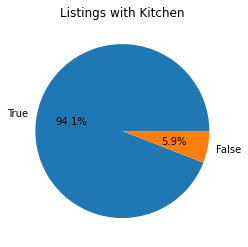

In [161]:
plt.pie(listings_cities['Kitchen'].value_counts().values, 
        labels = listings_cities['Kitchen'].value_counts().index, autopct = '%1.1f%%')

plt.title('Listings with Kitchen')

Text(0.5, 1.0, 'Listings with TV')

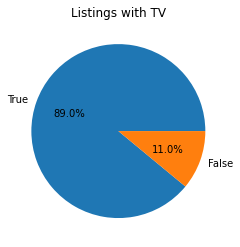

In [162]:
plt.pie(listings_cities['TV'].value_counts().values, 
        labels = listings_cities['TV'].value_counts().index, autopct = '%1.1f%%')

plt.title('Listings with TV')

Text(0.5, 1.0, 'Listings with Dedicated Workspace')

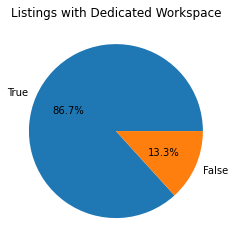

In [163]:
plt.pie(listings_cities['Dedicated workspace'].value_counts().values, 
        labels = listings_cities['Dedicated workspace'].value_counts().index, autopct = '%1.1f%%')

plt.title('Listings with Dedicated Workspace')

Text(0.5, 1.0, 'Listings offering Instant Booking')

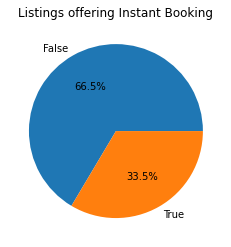

In [164]:
plt.pie(listings_cities['instant_bookable'].value_counts().values, 
        labels = listings_cities['instant_bookable'].value_counts().index, autopct = '%1.1f%%')

plt.title('Listings offering Instant Booking')

Text(0, 0.5, 'Price per Person (USD)')

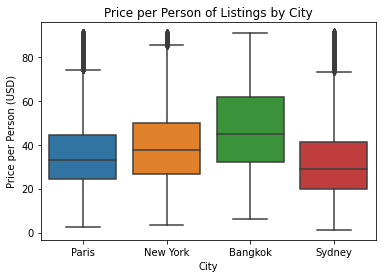

In [165]:
sns.boxplot(data = listings_cities, x = 'city', y = 'USD_pp')
plt.title('Price per Person of Listings by City')
plt.xlabel('City')
plt.ylabel('Price per Person (USD)')

Text(0, 0.5, 'Price per Person (USD)')

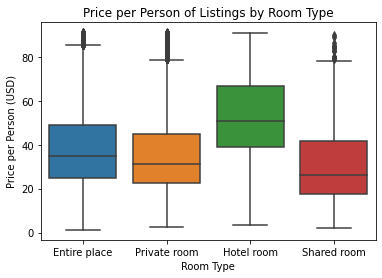

In [166]:
sns.boxplot(data = listings_cities, x = 'room_type', y = 'USD_pp')
plt.title('Price per Person of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price per Person (USD)')
#listings_raw.groupby(['room_type']).size()

<AxesSubplot:xlabel='Wifi'>

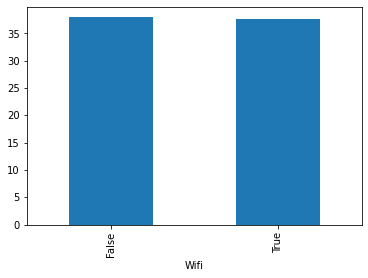

In [167]:
#plt.pie(listings_cities['Wifi'].value_counts().values, labels = listings_cities['Wifi'].value_counts().index, autopct = '%1.1f%%')

listings_cities.groupby('Wifi')['USD_pp'].mean().plot.bar()

In [168]:
#listings_cities.to_excel('Clean.xlsx', sheet_name = 'Sheet1', index = False)

## Cities Split 

In [169]:
paris_listings = listings_cities[(listings_cities['city'] == 'Paris')]
sydney_listings = listings_cities[(listings_cities['city'] == 'Sydney')]
ny_listings = listings_cities[(listings_cities['city'] == 'New York')]
bangkok_listings = listings_cities[(listings_cities['city'] == 'Bangkok')]

In [170]:
listings_cities.groupby(['city']).size()

city
Bangkok      7906
New York    21686
Paris       35727
Sydney      18942
dtype: int64

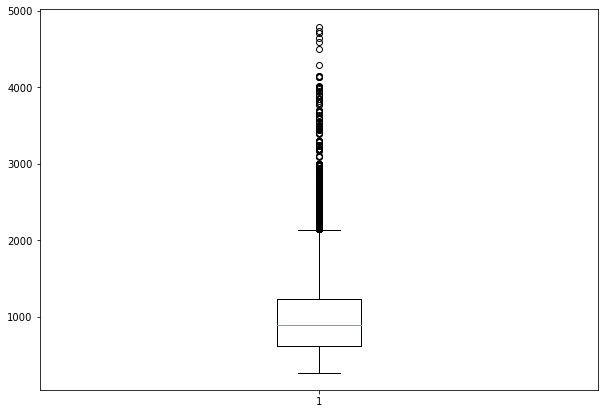

In [171]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(bangkok_listings['price'])
plt.show()

In [172]:
print(min(listings_cities['accommodates']))

1.0


C:\Users\Spand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Spand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Spand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

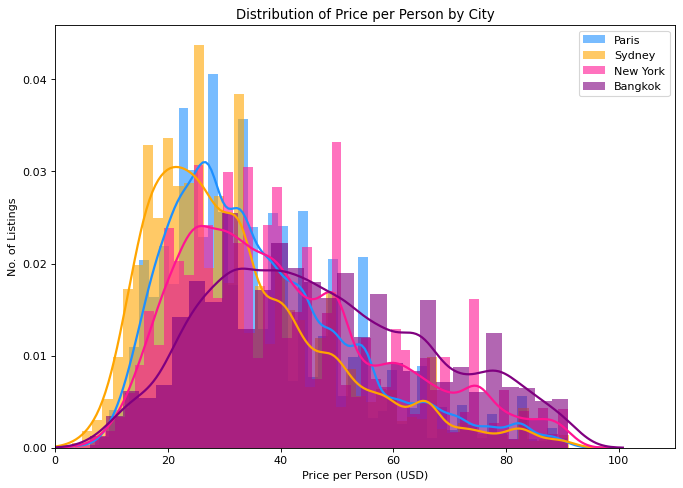

In [173]:
kwargs = dict(hist_kws = {'alpha':.6}, kde_kws = {'linewidth':2})

plt.figure(figsize = (10, 7), dpi = 80)
sns.distplot(paris_listings['USD_pp'], color = "dodgerblue", label = "Paris", **kwargs)
sns.distplot(sydney_listings['USD_pp'], color = "orange", label = "Sydney", **kwargs)
sns.distplot(ny_listings['USD_pp'], color = "deeppink", label = "New York", **kwargs)
sns.distplot(bangkok_listings['USD_pp'], color = "purple", label = "Bangkok", **kwargs)
plt.xlim(0, 110)
plt.title('Distribution of Price per Person by City')
plt.xlabel('Price per Person (USD)')
plt.ylabel('No. of Listings')
plt.legend();

In [174]:
bangkok_listings['USD_pp'].mode()

0    65.0
Name: USD_pp, dtype: float64

## Hypothesis Testing 

### Cities difference

In [175]:
stats.kruskal(paris_listings['USD_pp'], ny_listings['USD_pp'], sydney_listings['USD_pp'], bangkok_listings['USD_pp'])

KruskalResult(statistic=4704.1293766976605, pvalue=0.0)

### Room Type difference 

In [176]:
shared_listings = listings_cities[(listings_cities['room_type'] == 'Shared room')]
private_listings = listings_cities[(listings_cities['room_type'] == 'Private room')]
entire_listings = listings_cities[(listings_cities['room_type'] == 'Entire place')]
hotel_listings = listings_cities[(listings_cities['room_type'] == 'Hotel room')]

stats.kruskal(shared_listings['USD_pp'], private_listings['USD_pp'], entire_listings['USD_pp'], hotel_listings['USD_pp'])

KruskalResult(statistic=1661.6586981920937, pvalue=0.0)

### Hypothesis 1: Host vs Superhost

In [177]:
listings_cities.groupby(['host_is_superhost']).size()

host_is_superhost
False    67527
True     16734
dtype: int64

In [178]:
superhost_listings = listings_cities[(listings_cities['host_is_superhost'] == False)]
host_listings = listings_cities[(listings_cities['host_is_superhost'] == True)]

ztest(superhost_listings['USD_pp'], host_listings['USD_pp'], value=0)

(-22.575409534164145, 7.560614701787562e-113)

Text(0, 0.5, 'Price per Person (USD)')

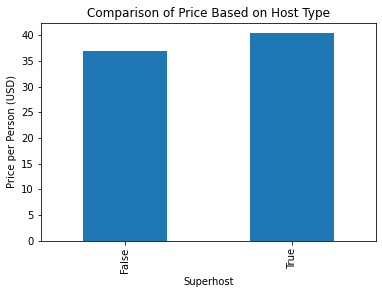

In [179]:
listings_cities.groupby('host_is_superhost')['USD_pp'].mean().plot.bar()
plt.title('Comparison of Price Based on Host Type')
plt.xlabel('Superhost')
plt.ylabel('Price per Person (USD)')

In [180]:
listings_cities.groupby('host_is_superhost')['USD_pp'].mean()

host_is_superhost
False    36.929613
True     40.371371
Name: USD_pp, dtype: float64

### Hypothesis 2: Room Type

In [181]:
listings_cities.groupby(['instant_bookable']).size()

instant_bookable
False    56000
True     28261
dtype: int64

In [182]:
instant_book = listings_cities[(listings_cities['instant_bookable'] == False)]
normal_book = listings_cities[(listings_cities['instant_bookable'] == True)]

ztest(instant_book['USD_pp'], normal_book['USD_pp'], value=0)

(2.692744252671389, 0.00708666059173072)

Text(0, 0.5, 'Price per Person (USD)')

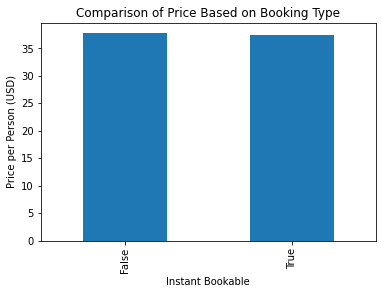

In [183]:
listings_cities.groupby('instant_bookable')['USD_pp'].mean().plot.bar()
plt.title('Comparison of Price Based on Booking Type')
plt.xlabel('Instant Bookable')
plt.ylabel('Price per Person (USD)')

In [184]:
listings_cities.groupby('instant_bookable')['USD_pp'].mean()

instant_bookable
False    37.729829
True     37.381907
Name: USD_pp, dtype: float64

### Hypothesis 3 : Wifi

In [185]:
listings_cities.groupby(['Wifi']).size()

Wifi
False     2415
True     81846
dtype: int64

In [186]:
listings_no_wifi = listings_cities[(listings_cities['Wifi'] == False)]
listings_wifi = listings_cities[(listings_cities['Wifi'] == True)]

ztest(listings_no_wifi['USD_pp'], listings_wifi['USD_pp'], value=0)

(0.8902943059463673, 0.37330787777963903)

Text(0, 0.5, 'Price per Person (USD)')

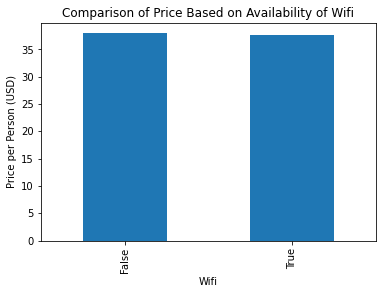

In [187]:
listings_cities.groupby('Wifi')['USD_pp'].mean().plot.bar()
plt.title('Comparison of Price Based on Availability of Wifi')
plt.xlabel('Wifi')
plt.ylabel('Price per Person (USD)')

In [188]:
listings_cities.groupby('Wifi')['USD_pp'].mean()

Wifi
False    37.929319
True     37.603807
Name: USD_pp, dtype: float64

### Hypothesis 4: Heating

In [189]:
listings_no_heating = listings_cities[(listings_cities['Heating'] == False)]
listings_heating = listings_cities[(listings_cities['Heating'] == True)]

ztest(listings_no_heating['USD_pp'], listings_heating['USD_pp'], value=0)

(0.7728629743784615, 0.43960347918593023)

Text(0, 0.5, 'Price per Person (USD)')

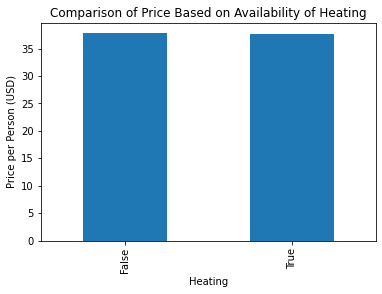

In [190]:
listings_cities.groupby('Heating')['USD_pp'].mean().plot.bar()
plt.title('Comparison of Price Based on Availability of Heating')
plt.xlabel('Heating')
plt.ylabel('Price per Person (USD)')

In [191]:
listings_cities.groupby('Heating')['USD_pp'].mean()

Heating
False    37.758246
True     37.597817
Name: USD_pp, dtype: float64

### Hypothesis 5: Kitchen

In [192]:
listings_no_Kitchen = listings_cities[(listings_cities['Kitchen'] < 1)]
listings_Kitchen = listings_cities[(listings_cities['Kitchen'] > 0)]

ztest(listings_no_Kitchen['USD_pp'], listings_Kitchen['USD_pp'], value=0)

(-1.2984838562437708, 0.19412112025082295)

Text(0, 0.5, 'Price per Person (USD)')

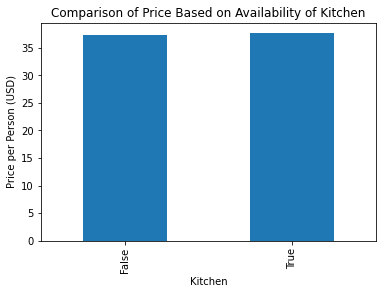

In [193]:
listings_cities.groupby('Kitchen')['USD_pp'].mean().plot.bar()
plt.title('Comparison of Price Based on Availability of Kitchen')
plt.xlabel('Kitchen')
plt.ylabel('Price per Person (USD)')

In [194]:
listings_cities.groupby('Kitchen')['USD_pp'].mean()

Kitchen
False    37.297515
True     37.633017
Name: USD_pp, dtype: float64

### Hypothesis 6: TV

In [195]:
listings_no_TV = listings_cities[(listings_cities['TV'] < 1)]
listings_TV = listings_cities[(listings_cities['TV'] > 0)]

ztest(listings_no_TV['USD_pp'], listings_TV['USD_pp'], value=0)

(0.8339107312256996, 0.40433128960919207)

Text(0, 0.5, 'Price per Person (USD)')

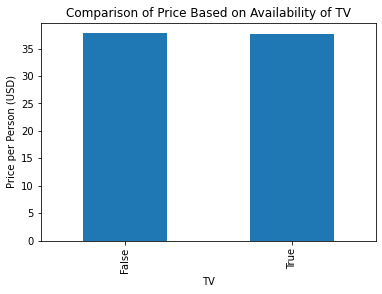

In [196]:
listings_cities.groupby('TV')['USD_pp'].mean().plot.bar()
plt.title('Comparison of Price Based on Availability of TV')
plt.xlabel('TV')
plt.ylabel('Price per Person (USD)')

In [197]:
listings_cities.groupby('TV')['USD_pp'].mean()

TV
False    37.757874
True     37.595256
Name: USD_pp, dtype: float64

### Hypothesis 7: Dedicated Workspace

In [198]:
listings_no_DW = listings_cities[(listings_cities['Dedicated workspace'] < 1)]
listings_DW = listings_cities[(listings_cities['Dedicated workspace'] > 0)]

ztest(listings_no_DW['USD_pp'], listings_DW['USD_pp'], value=0)

(-1.2587582899850864, 0.2081176500809685)

Text(0, 0.5, 'Price per Person (USD)')

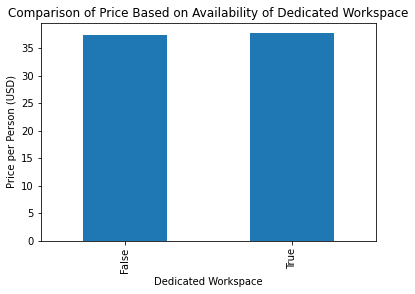

In [199]:
listings_cities.groupby('Dedicated workspace')['USD_pp'].mean().plot.bar()
plt.title('Comparison of Price Based on Availability of Dedicated Workspace')
plt.xlabel('Dedicated Workspace')
plt.ylabel('Price per Person (USD)')

In [200]:
listings_cities.groupby('Dedicated workspace')['USD_pp'].mean()

Dedicated workspace
False    37.416695
True     37.643154
Name: USD_pp, dtype: float64

### Hypothesis 8: Room Type and Property Type

In [201]:
place_room_pivot = pd.crosstab(listings_cities['property_type'],listings_cities['room_type'])
place_room_pivot

room_type,Entire place,Hotel room,Private room,Shared room
property_type,,,,
Barn,3,0,0,0
Boat,17,0,0,0
Camper/RV,14,0,0,0
Campsite,1,0,0,0
Casa particular,1,0,0,0
...,...,...,...,...
Tent,2,0,0,0
Tiny house,40,0,0,0
Train,1,0,0,0


In [202]:
chi2, p_val, dof, expected = stats.chi2_contingency(place_room_pivot)
print(f"chi2 : {chi2}, p_val : {p_val}, dof : {dof} \nP value is lesser than 0.05 : {p_val < 0.05}")

#The null hypothesis is rejected as the p value is lesser than 0.05, hence the alternative hypothesis is accepted. 
#We can confirm that there is a dependency between the property type and the room type. This can be seen in the bar chart above.

chi2 : 223050.4964410953, p_val : 0.0, dof : 285 
P value is lesser than 0.05 : True


In [203]:
tv_wifi_pivot = pd.crosstab(listings_cities['Wifi'],listings_cities['TV'])
tv_wifi_pivot

TV,False,True
Wifi,,
False,1103,1312
True,8162,73684


In [204]:
chi2, p_val, dof, expected = stats.chi2_contingency(tv_wifi_pivot)
print(f"chi2 : {chi2}, p_val : {p_val}, dof : {dof} \nP value is lesser than 0.05 : {p_val < 0.05}")

#The null hypothesis is rejected as the p value is lesser than 0.05, hence the alternative hypothesis is accepted. 
#We can confirm that there is a dependency between the property type and the room type. This can be seen in the bar chart above.

chi2 : 3051.316850291042, p_val : 0.0, dof : 1 
P value is lesser than 0.05 : True


### Hypothesis 9: Accommodates vs Price per person

Text(0.5, 0, 'Price Per Person (USD)')

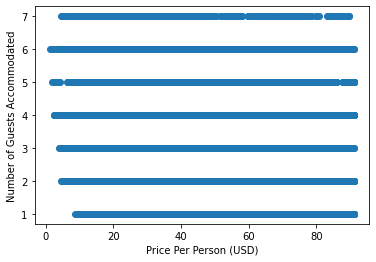

In [205]:
plt.scatter(listings_cities['USD_pp'], listings_cities['accommodates'])
plt.ylabel('Number of Guests Accommodated', fontsize = 10)
plt.xlabel('Price Per Person (USD)', fontsize = 10)

In [206]:
print(np.corrcoef(listings_cities['USD_pp'], listings_cities['accommodates']))

[[ 1.         -0.20122597]
 [-0.20122597  1.        ]]


### Hypothesis 10: Host months vs price per person

Text(0.5, 0, 'Price Per Person (USD)')

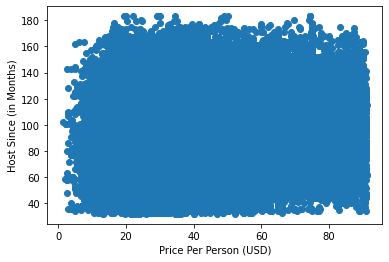

In [207]:
plt.scatter(listings_cities['USD_pp'], listings_cities['Host Months'])
plt.ylabel('Host Since (in Months)', fontsize = 10)
plt.xlabel('Price Per Person (USD)', fontsize = 10)

In [208]:
print(np.corrcoef(listings_cities['USD_pp'], listings_cities['Host Months']))

[[1.         0.07754161]
 [0.07754161 1.        ]]


## Regression Modelling

### Paris Listings 

In [242]:
x = paris_listings[['host_is_superhost', 'room_type_code', 'instant_bookable', 'Wifi', 'Heating', 'TV']]
y = paris_listings['USD_pp']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
model = LinearRegression()
model.fit(x_train, y_train)
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
host_is_superhost,5.777966
room_type_code,4.305831
instant_bookable,1.158758
Wifi,-0.207464
Heating,0.762529
TV,0.669169


In [243]:
print(model.intercept_)

25.750360150755974


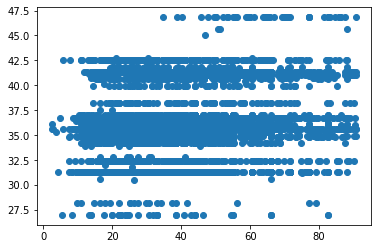

In [244]:
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

In [245]:
print(metrics.mean_absolute_error(y_test, predictions), metrics.mean_squared_error(y_test, predictions), np.sqrt(metrics.mean_squared_error(y_test, predictions)))

12.572273609653175 253.2910864551489 15.915121314496755


### New York Listings 

In [246]:
x = ny_listings[['host_is_superhost', 'room_type_code', 'instant_bookable', 'Wifi', 'Heating', 'TV']]
y = ny_listings['USD_pp']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
model = LinearRegression()
model.fit(x_train, y_train)
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
host_is_superhost,-0.544965
room_type_code,5.318797
instant_bookable,-2.531938
Wifi,-0.921496
Heating,1.339710
TV,0.715734


In [247]:
print(model.intercept_)

32.90348614604997


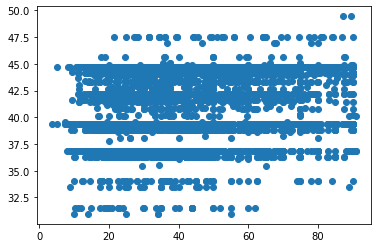

In [248]:
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

In [249]:
print(metrics.mean_absolute_error(y_test, predictions), metrics.mean_squared_error(y_test, predictions), np.sqrt(metrics.mean_squared_error(y_test, predictions)))

14.887567311697325 338.20123296375874 18.39024831163948


### Bangkok Listings 

In [250]:
x = ny_listings[['host_is_superhost', 'room_type_code', 'instant_bookable', 'Wifi', 'Heating', 'TV']]
y = ny_listings['USD_pp']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
model = LinearRegression()
model.fit(x_train, y_train)
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
host_is_superhost,-0.761772
room_type_code,5.438787
instant_bookable,-2.774047
Wifi,-0.861837
Heating,1.566672
TV,0.015927


In [251]:
print(model.intercept_)

33.41754938575616


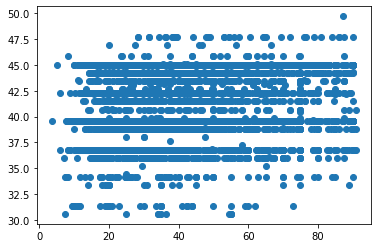

In [252]:
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

In [253]:
print(metrics.mean_absolute_error(y_test, predictions), metrics.mean_squared_error(y_test, predictions), np.sqrt(metrics.mean_squared_error(y_test, predictions)))

14.853884318363155 332.6581498173325 18.238918548459296


### Sydney Listings 

In [254]:
x = sydney_listings[['host_is_superhost', 'room_type_code', 'instant_bookable', 'Wifi', 'Heating', 'TV']]
y = sydney_listings['USD_pp']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
model = LinearRegression()
model.fit(x_train, y_train)
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
host_is_superhost,0.792176
room_type_code,8.370644
instant_bookable,-2.999946
Wifi,0.418106
Heating,1.110502
TV,-0.869835


In [255]:
print(model.intercept_)

19.20736478637194


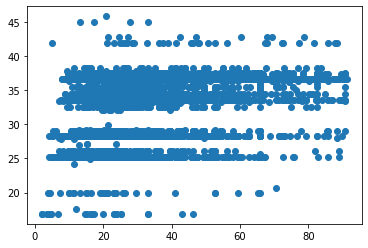

In [256]:
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

In [257]:
print(metrics.mean_absolute_error(y_test, predictions), metrics.mean_squared_error(y_test, predictions), np.sqrt(metrics.mean_squared_error(y_test, predictions)))

12.506319775872965 261.39192178028026 16.16761954587874
